In [7]:
from email import utils
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision.utils import save_image
from torchvision.utils import make_grid
import random
import os
from model_cGAN import Generator
from parameters import *
import matplotlib.pyplot as plt

artist_to_idx = {
    "Abstract_Expressionism": 0,
    "Action_painting": 1,
    "Analytical_Cubism": 2,
    "Art_Nouveau_Modern": 3,
    "Baroque":4,
    "Color_Field_Painting":5,
    "Contemporary_Realism":6,
    "Cubism":7,
    "Early_Renaissance":8,
    "Expressionism":9,
    "Fauvism":10,
    "High_Renaissance":11,
    "Impressionism":12,
    "Mannerism_Late_Renaissance":13,
    "Minimalism":14,
    "Naive_Art_Primitivism":15,
    "New_Realism":16,
    "Northern_Renaissance":17,
    "Pointillism":18,
    "Pop_Art":19,
    "Post_Impressionism":20,
    "Realism":21,
    "Rococo":22,
    "Romanticism":23,
    "Symbolism":24,
    "Synthetic_Cubism":25,
    "Ukiyo_e":26,
    
}

ngpu = 1
netG = Generator(ngpu)
netG.load_state_dict(torch.load('generator.pth'))
netG.eval()

def generatePhoto(artist_name,number):
    if artist_name not in artist_to_idx:
        raise ValueError(f"Artist name {artist_name} not found in artist_to_idx mapping")
    
    label = torch.LongTensor([artist_to_idx[artist_name]])
    noise = Variable(torch.randn(number*2, nz, 1, 1))

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    netG.to(device)
    noise = noise.to(device)
    label = label.repeat(number*2).to(device)

    with torch.no_grad():
        generated_imgs = netG(noise, label).detach().cpu()
    
    grid = make_grid(generated_imgs, nrow=number, normalize=True)
    np_image = grid.numpy().transpose((1, 2, 0))

    plt.imshow(np_image)
    plt.title(f'Generated Images: {artist_name}')
    plt.axis('off')
    plt.show()
    return generated_imgs


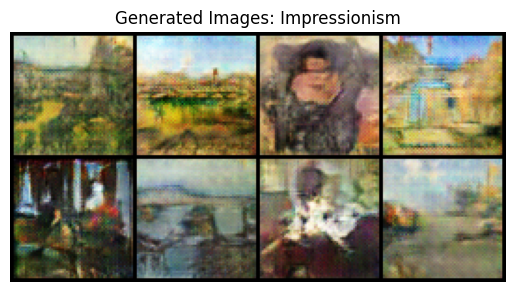

tensor([[[[ 4.7502e-01,  4.6434e-01,  4.3308e-01,  ...,  6.0549e-01,
            4.7571e-01,  5.2372e-01],
          [ 4.9590e-01,  4.3153e-01,  4.2894e-01,  ...,  6.8556e-01,
            6.4108e-01,  7.0643e-01],
          [ 4.7863e-01,  4.0685e-01,  4.8116e-01,  ...,  7.1590e-01,
            6.5997e-01,  7.2041e-01],
          ...,
          [-2.9060e-01, -4.0959e-01, -4.7582e-01,  ..., -5.8725e-01,
           -6.3481e-01, -6.3330e-01],
          [-3.6578e-01, -3.0327e-01, -4.6457e-01,  ..., -4.6905e-01,
           -6.1627e-01, -5.9199e-01],
          [-2.1469e-01, -1.9696e-01, -1.9144e-01,  ..., -3.5698e-01,
           -5.0868e-01, -5.5509e-01]],

         [[ 5.6120e-01,  5.5467e-01,  6.4896e-01,  ...,  6.0723e-01,
            6.1212e-01,  5.1830e-01],
          [ 5.9169e-01,  5.7699e-01,  5.1002e-01,  ...,  6.8403e-01,
            6.0654e-01,  5.8559e-01],
          [ 6.6527e-01,  6.1497e-01,  6.6907e-01,  ...,  7.6248e-01,
            6.7524e-01,  6.2245e-01],
          ...,
     

In [46]:
generatePhoto("Impressionism",4)